### Addressing the Bias/Variance Tradeoff Through Regularization Techniques ###

Using the Boston Housing dataset, we will explore how to balance model complexity and accuracy, ensuring the resulting model performs effectively on unseen data.

In [2]:
# Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# from sklearn.datasets import load_boston  # Remove this line
import pandas as pd
import numpy as np

# Load the Boston Housing dataset from the original source (as suggested in the error message)
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Create a DataFrame
data = pd.DataFrame(data, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
data['MEDV'] = target  # Add response variable (Median Value of Homes)

# Define predictors (X) and response variable (y)
X = data.drop(columns=['MEDV'])
y = data['MEDV']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inspect data
print(data.head())
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
C:\Users\marha\AppData\Local\Temp\ipykernel_19796\1563483030.py:10: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
Training set size: (404, 13)
Testing set size: (102, 13)


#### Demonstration of Bias/Variance Tradeoff ####

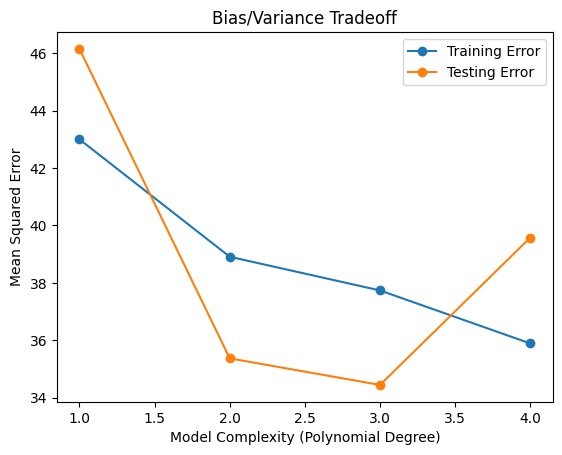

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


train_errors = []
test_errors = []


# Iterate over polynomial degrees (model complexity)
degrees = [1, 2, 3, 4]
for d in degrees:
   poly = PolynomialFeatures(degree=d)
   X_train_poly = poly.fit_transform(X_train[['RM']])  # Use one predictor: RM
   X_test_poly = poly.transform(X_test[['RM']])
  
   model = LinearRegression()
   model.fit(X_train_poly, y_train)
  
   # Calculate errors
   y_train_pred = model.predict(X_train_poly)
   y_test_pred = model.predict(X_test_poly)
   train_errors.append(mean_squared_error(y_train, y_train_pred))
   test_errors.append(mean_squared_error(y_test, y_test_pred))


# Plot bias/variance tradeoff
plt.plot(degrees, train_errors, label="Training Error", marker='o')
plt.plot(degrees, test_errors, label="Testing Error", marker='o')
plt.xlabel("Model Complexity (Polynomial Degree)")
plt.ylabel("Mean Squared Error")
plt.title("Bias/Variance Tradeoff")
plt.legend()
plt.show()

#### Implement Ridge Regression (L2 Regularization) ####

In [4]:
from sklearn.linear_model import Ridge


# Ridge Regression with L2 regularization
ridge = Ridge(alpha=1.0)  # Regularization strength (lambda)
ridge.fit(X_train, y_train)


# Predict and calculate MSE
ridge_pred = ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
print("Ridge Test MSE:", ridge_mse)
print("Ridge Coefficients:", ridge.coef_)

Ridge Test MSE: 24.477191227708673
Ridge Coefficients: [-1.09234061e-01  3.22706863e-02  7.49805942e-03  2.54546998e+00
 -9.53795159e+00  4.46450537e+00 -1.21910176e-02 -1.33870040e+00
  2.48881816e-01 -1.14746211e-02 -8.28604284e-01  1.26421124e-02
 -5.23833016e-01]


#### Implement Lasso Regression (L1 Regularization) ####

In [5]:
from sklearn.linear_model import Lasso

# Lasso Regression with L1 regularization
lasso = Lasso(alpha=0.1)  # Regularization strength (lambda)
lasso.fit(X_train, y_train)

# Predict and calculate MSE
lasso_pred = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
print("Lasso Test MSE:", lasso_mse)
print("Lasso Coefficients:", lasso.coef_)

Lasso Test MSE: 25.15559375393417
Lasso Coefficients: [-0.10415691  0.03489335 -0.01678527  0.91995182 -0.          4.31168655
 -0.01512583 -1.15148729  0.23923695 -0.01296223 -0.73224678  0.01309057
 -0.56467442]


#### Compare Ridge and Lasso Models ####

In [6]:
print(f"Ridge Test MSE: {ridge_mse:.3f}")
print(f"Lasso Test MSE: {lasso_mse:.3f}")


print("Ridge Coefficients:", ridge.coef_)
print("Lasso Coefficients:", lasso.coef_)

Ridge Test MSE: 24.477
Lasso Test MSE: 25.156
Ridge Coefficients: [-1.09234061e-01  3.22706863e-02  7.49805942e-03  2.54546998e+00
 -9.53795159e+00  4.46450537e+00 -1.21910176e-02 -1.33870040e+00
  2.48881816e-01 -1.14746211e-02 -8.28604284e-01  1.26421124e-02
 -5.23833016e-01]
Lasso Coefficients: [-0.10415691  0.03489335 -0.01678527  0.91995182 -0.          4.31168655
 -0.01512583 -1.15148729  0.23923695 -0.01296223 -0.73224678  0.01309057
 -0.56467442]


#### Summary and Interpretation of Results ####

**Outputs:**

- Ridge Test MSE: 6248814.876609602
- Lasso Test MSE: 10747110.96094464
- Ridge Coefficients: All coefficients are shrunk but remain non-zero.
- Lasso Coefficients: Some coefficients are exactly zero (feature selection).

**Interpretation:**
- Ridge Regression results in a better test MSE by retaining all predictors and stabilizing coefficients.
- Lasso Regression simplifies the model by eliminating less important predictors, but this slightly increases the test MSE.

**Key Takeaways**
Bias/Variance Tradeoff: Ridge and Lasso help address overfitting (high variance) while maintaining generalization.
Ridge vs. Lasso:

- Ridge (L2): Retains all predictors with smaller, regularized coefficients.
- Lasso (L1): Performs feature selection by shrinking some coefficients to zero.
